In [137]:
import pandas as pd
import plotly_express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [138]:
df = pd.read_csv("data.csv")

In [139]:
df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [140]:
df.head()

,Em qual fase do curso você está?,Qual a sua principal área de interesse?,Qual a sua área de interesse secundária?,Qual a sua área de menor interesse?,Está empregado(a) em sua área de interesse?,Já esteve empregado(a) em sua área de interesse?,Está satisfeito com sua atual função?
0,Quinta,Inteligência Artificial,Cientista de Dados,Desenvolvimento Web Front-end,Não estou,Sim,Atualmente fora do mercado de trabalho.
1,Quinta,Gerente de Projetos,Game Dev,Tester,Estou na minha principal,Sim,Muito satisfeito.
2,Quinta,Segurança da Informação,Inteligência Artificial,Desenvolvimento Web Full Stack,Não estou,Sim,Satisfeito.
3,Oitava,Segurança da Informação,Segurança da Informação,Desenvolvimento Mobile,Não estou,Não,Neutro.
4,Oitava,Administração de Redes,Segurança da Informação,Game Dev,Estou na minha principal,Sim,Satisfeito.


In [141]:
df.columns

Index(['Em qual fase do curso você está?',
       'Qual a sua principal área de interesse?',
       'Qual a sua área de interesse secundária?',
       'Qual a sua área de menor interesse?',
       'Está empregado(a) em sua área de interesse?',
       'Já esteve empregado(a) em sua área de interesse?',
       'Está satisfeito com sua atual função?'],
      dtype='object')

## PLots

In [142]:
# Empregado na área de interesse
fig1 = px.pie(df, names='Está empregado(a) em sua área de interesse?',
              title='Está empregado(a) em sua área de interesse?',
)

fig1.update_layout(width=420, height=400)

fig1.update_traces(marker=dict(colors=['orange', 'green']),pull=[0.02, 0.02])

fig1.update_layout(title=dict(text='Está empregado(a) em sua área de interesse?', x=0.5, xanchor='center'))

fig1.update_layout(images=[dict(
    xref="paper",
    yref="paper",
    x=0.5,
    y=0.5,
    sizex=1,
    sizey=1,
    xanchor="center",
    yanchor="middle"
)])

fig1.update_layout(legend=dict(orientation='h', y=1.02, x=0.5, xanchor='center', yanchor='bottom'))


fig1.show()



In [143]:
# Ja esteve empregado
fig2 = px.pie(df, names='Já esteve empregado(a) em sua área de interesse?',
              title='Já esteve empregado(a) em sua área de interesse?')

fig2.update_layout(width=450, height=400)

fig2.update_traces(pull=[0.05, 0.05])

fig2.update_layout(title=dict(text='Já esteve empregado(a) em sua área de interesse?', x=0.5, xanchor='center'))

fig2.update_layout(images=[dict(
    xref="paper",
    yref="paper",
    x=0.5,
    y=0.5,
    sizex=1,
    sizey=1,
    xanchor="center",
    yanchor="middle"
)])

fig2.update_layout(legend=dict(orientation='h', y=1.02, x=0.5, xanchor='center', yanchor='bottom'))


fig2.show()

In [144]:
# Satisfeito
fig3 = px.pie(df, names='Está satisfeito com sua atual função?', title='Está satisfeito com sua atual função?')

fig3.update_layout(width=550, height=600)

fig3.update_layout(title=dict(text='Está satisfeito com sua atual função?', x=0.5, xanchor='center', yanchor='top', y=0.97))

# Adjust the layout to move the legend above the title
fig3.update_layout(legend=dict(orientation='h', y=0.97, x=0.5, xanchor='center', yanchor='bottom'))

# Adjust the layout to move the graph below the legend
fig3.update_layout(margin=dict(t=150, b=0))  # You can adjust the 't' parameter to control the top margin

# Show the plot
fig3.show()

In [145]:
# Este gráfico de mosaico mostra a distribuição do status de emprego nas áreas de interesse atuais e anteriores

df_categorical = df[['Está empregado(a) em sua área de interesse?',
                     'Já esteve empregado(a) em sua área de interesse?']].astype('category')

# Create a contingency table with specified category orders
contingency_table = pd.crosstab(
    df_categorical['Está empregado(a) em sua área de interesse?'],
    df_categorical['Já esteve empregado(a) em sua área de interesse?'],
    rownames=['Current Employment in Area of Interest'],
    colnames=['Previous Employment in Area of Interest'],
    margins=True,
    margins_name='Total',
    dropna=False,
    normalize=False,
    values=None,
    aggfunc=None
)

# Specify the column order
contingency_table = contingency_table[['Sim', 'Não']]

# Mosaic plot with improved aesthetics
fig4 = px.imshow(
    contingency_table,
    labels=dict(color="Count"),
    title='Comparativo entre situação profissional presente e passada',
    width=800,
    height=500,
    color_continuous_scale='Blues',
    color_continuous_midpoint=contingency_table.values.max() / 2,
)

fig4.update_layout(title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))


# Add annotations to cells for better readability
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        fig4.add_annotation(
            dict(
                x=contingency_table.columns[j],
                y=contingency_table.index[i],
                text=str(contingency_table.iloc[i, j]),
                showarrow=False,
                font=dict(color='white' if contingency_table.iloc[i, j] > contingency_table.values.max() / 2 else 'black')
            )
        )

# Improve axis labels
fig4.update_xaxes(title_text='Já esteve empregado(a) em sua área de interesse?')
fig4.update_yaxes(title_text='Está empregado(a) em sua área de interesse?')

# Show the plot
fig4.show()

In [146]:
columns_for_distplots = ['Em qual fase do curso você está?',
                          'Qual a sua principal área de interesse?',
                          'Qual a sua área de interesse secundária?',
                          'Qual a sua área de menor interesse?']


In [147]:
fig5 = px.histogram(df, x=columns_for_distplots[0], title='Distribuição da Fase do Curso')

fig5.update_yaxes(title_text='Quantidade', dtick=1)

fig5.update_layout(yaxis=dict(showgrid=False))

fig5.update_layout(title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

fig5.update_layout(height=400, width=600)

fig5.update_layout(xaxis=dict(type='category', categoryorder='min ascending'))

fig5.show()


In [148]:
fig6 = px.histogram(df, x=columns_for_distplots[1], title='Distribuição da Área de Interesse Principal')

fig6.update_yaxes(title_text='Quantidade', dtick=1)

fig6.update_layout(yaxis=dict(showgrid=False))

fig6.update_layout(title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

fig6.update_layout(height=600, width=800)

fig6.update_layout(xaxis=dict(type='category', categoryorder='min ascending', tickangle=45))

fig6.show()

In [149]:
fig7 = px.histogram(df, x=columns_for_distplots[2], title='Distribuição da Área de Interesse Secundária')

fig7.update_yaxes(title_text='Quantidade', dtick=1)

fig7.update_layout(yaxis=dict(showgrid=False))

fig7.update_layout(title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

fig7.update_layout(height=600, width=800)

fig7.update_layout(xaxis=dict(type='category', categoryorder='min ascending', tickangle=45))

fig7.show()

In [150]:
fig8 = px.histogram(df, x=columns_for_distplots[3], title='Distribuição da Menor Área de Interesse')

fig8.update_yaxes(title_text='Quantidade', dtick=1)

fig8.update_layout(yaxis=dict(showgrid=False))

fig8.update_layout(title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

fig8.update_layout(height=600, width=800)

fig8.update_layout(xaxis=dict(type='category', categoryorder='min ascending', tickangle=45))

fig8.show()

Matriz de correlação

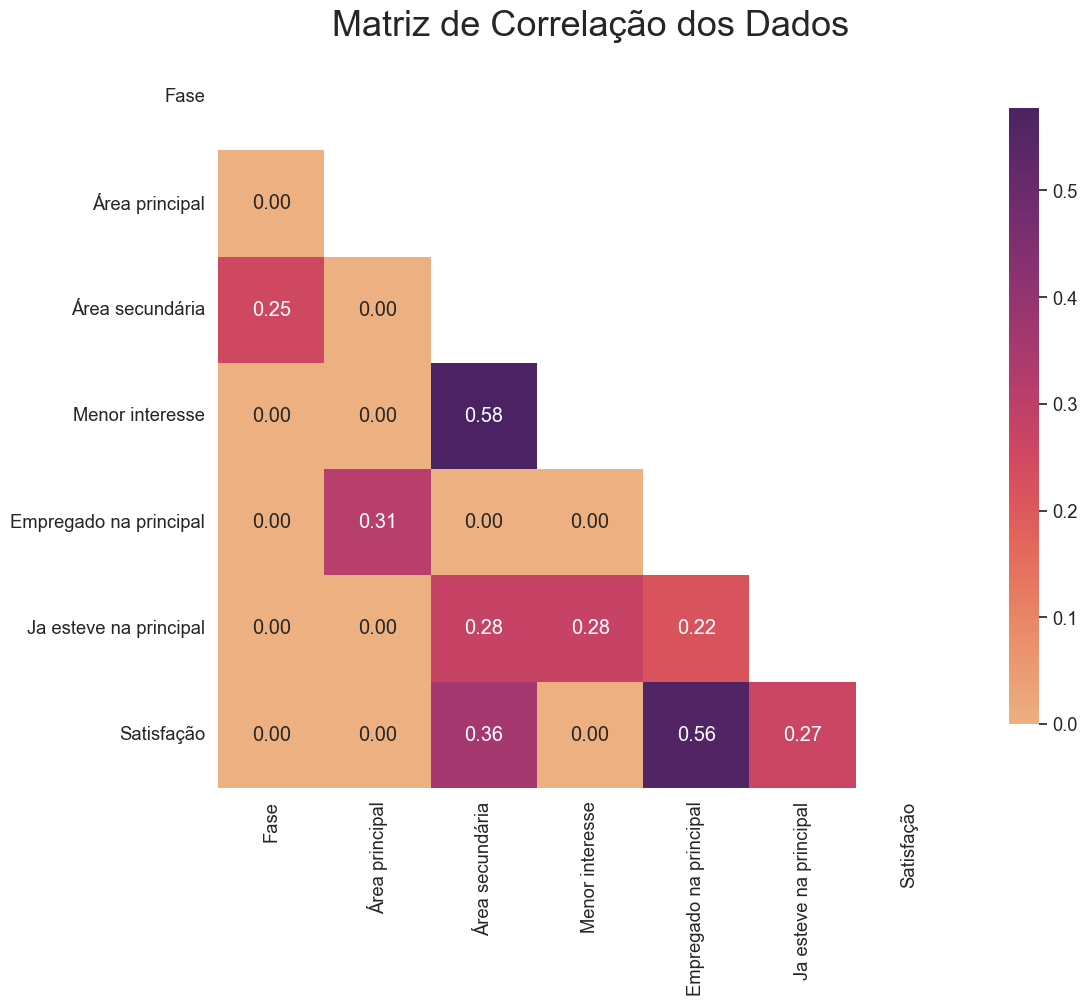

In [167]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create an empty matrix to store Cramér's V values
num_cols = len(df.columns)
cramers_matrix = pd.DataFrame(np.zeros((num_cols, num_cols)), columns=df.columns, index=df.columns)

# Calculate Cramér's V for each pair of categorical variables
for i in range(num_cols):
    for j in range(i+1, num_cols):
        cramers_matrix.iloc[i, j] = cramers_v(df.iloc[:, i], df.iloc[:, j])
        cramers_matrix.iloc[j, i] = cramers_matrix.iloc[i, j]

# Display the Cramér's V matrix
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.set_style("white")
mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))
cmap = sns.color_palette("flare", as_cmap=True)

custom_labels = ["Fase", "Área principal", "Área secundária", "Menor interesse", "Empregado na principal", "Ja esteve na principal", "Satisfação"]
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask, linewidths=0, square=True, cbar_kws={"shrink": 0.8},
            xticklabels=custom_labels, yticklabels=custom_labels)

plt.title("Matriz de Correlação dos Dados", fontsize=26)
plt.show()